In [1]:
#Importing Usefull liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the Data
df=pd.read_csv("E:/C-Drive/Shahbaz Alam/Python/Email Marketing Analysis.csv")

### <font color=darkpink>                         Data Preparation                                                </font> ###

In [3]:
#Checking the heads to get an overview
df.head()

,Column1,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled on,Living status
0,00005DCC-4E51-41A5-91C5-6635B24C7D17,Business,InActive,NaN,NaN,500024.0,MALE,12-Aug-18,U,12-Aug-18,couple with children
1,0001F49E-9FE7-11e8-9E9C-00505682069A,Individual,Active,Valsad,GUJARAT,396001.0,MALE,02-Nov-92,M,14-Aug-18,couple with children
2,0001F4A2-9FE7-11e8-9E9C-00505682069A,Individual,Active,Secunderabad,TELANGANA,500011.0,FEMALE,25-Nov-88,M,14-Aug-18,couple with children
3,0001F4CD-9FE7-11e8-9E9C-00505682069A,Individual,Active,Nalgonda,TELANGANA,508101.0,MALE,13-Jun-83,M,14-Aug-18,couple with children
4,0001F4DE-9FE7-11e8-9E9C-00505682069A,Individual,Active,Hyderabad,TELANGANA,500028.0,MALE,13-Jul-75,M,14-Aug-18,couple with children


In [4]:
#Checking the Shape to know how big data is
df.shape

(10000, 11)

In [5]:
#Checking the Duplicate values
df.duplicated().sum()

0

In [6]:
#Checkig the data types of all the columns
df.dtypes

Column1           object
Type              object
Status            object
City              object
State             object
PostalCode       float64
GenderCode        object
BirthDate         object
MaritalStatus     object
Enrolled on       object
Living status     object
dtype: object

<AxesSubplot:>

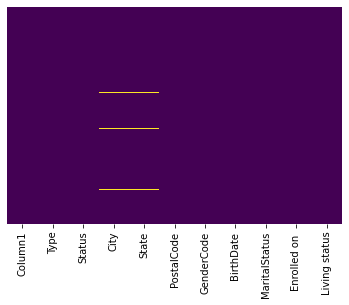

In [7]:
# Checking the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#Droping the Rows which is having Null values in "City" & "State" Column
df=df.dropna(subset=['City','State'])
df.shape

(9874, 11)

<AxesSubplot:>

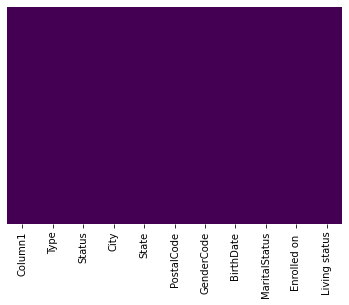

In [9]:
# Again Checking the null values using heatmap whether its removed or not
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#Droping the Birthday column as it is least important
df= df.drop('BirthDate',axis=1)

In [11]:
#checking the column names whether Deleted or not
df.columns

Index(['Column1', 'Type', 'Status', 'City', 'State', 'PostalCode',
       'GenderCode', 'MaritalStatus', 'Enrolled on ', 'Living status'],
      dtype='object')

<AxesSubplot:xlabel='PostalCode', ylabel='Density'>

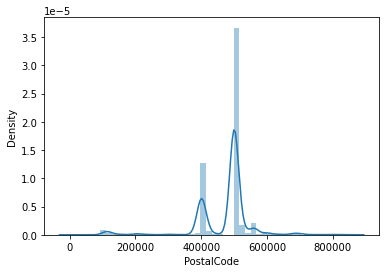

In [12]:
#Since we have one null value in "Postal code" we are going to replcae it.
sns.distplot(df.PostalCode)

In [13]:
#We are going to replace the missing value with "Median"
df['PostalCode']= df['PostalCode'].fillna(df['PostalCode'].median()) 

In [14]:
#Again checking the null values
df.isnull().sum()

Column1          0
Type             0
Status           0
City             0
State            0
PostalCode       0
GenderCode       0
MaritalStatus    0
Enrolled on      0
Living status    0
dtype: int64

### <font color=darkpink> Now The Data is ready to Explore</font> ###

<AxesSubplot:xlabel='Type', ylabel='count'>

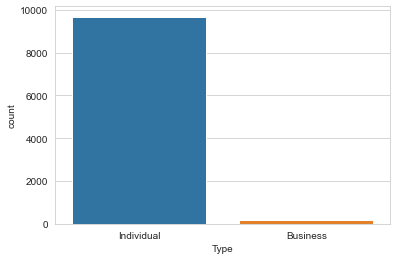

In [15]:
#Checking the count of the customer "Type" using countplot
sns.set_style('whitegrid')
sns.countplot(x='Type',data=df)

### <font color=orange> We Can See out of this Data set most of our customers are Individuals and Business Types of accounts are very less </font> ###

<AxesSubplot:xlabel='Status', ylabel='count'>

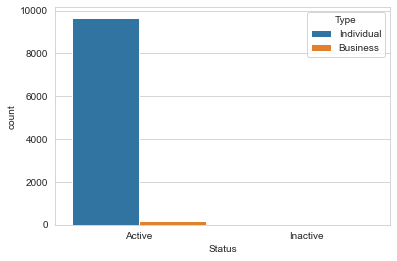

In [16]:
#Checking the customer type account status using count plot
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Type', data=df)

### <font color=orange> We Can See most of our Active customers are Individuals and Active Business Types of accounts are very low </font> ###

In [17]:
#Creating a new datafrme and Checking the Top 10 States which is having Active status
top_10_State = df['State'].value_counts().nlargest(10).index.tolist()
df_top_10C = df[df['State'].isin(top_10_State)]

<AxesSubplot:xlabel='State', ylabel='count'>

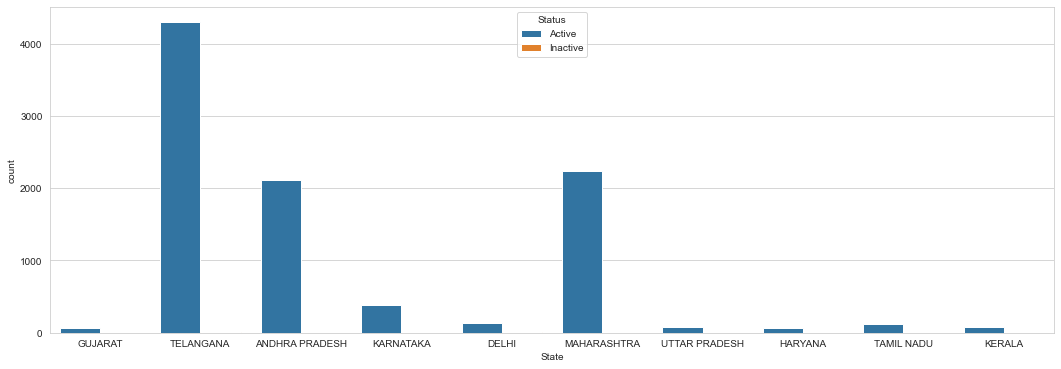

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))
sns.countplot(x='State', hue='Status', data=df_top_10C)

### <font color=orange>  Out of this 10 top States above, We can see Telangana, Maharashtra & Andrhra Pradesh covering almost more than 80% of our customers </font> ###

In [19]:
#Creating a new datafrme and Checking the Top 10 Cities which is having Active status
top_10_cities = df['City'].value_counts().nlargest(10).index.tolist()
df_top_10 = df[df['City'].isin(top_10_cities)]

<AxesSubplot:xlabel='City', ylabel='count'>

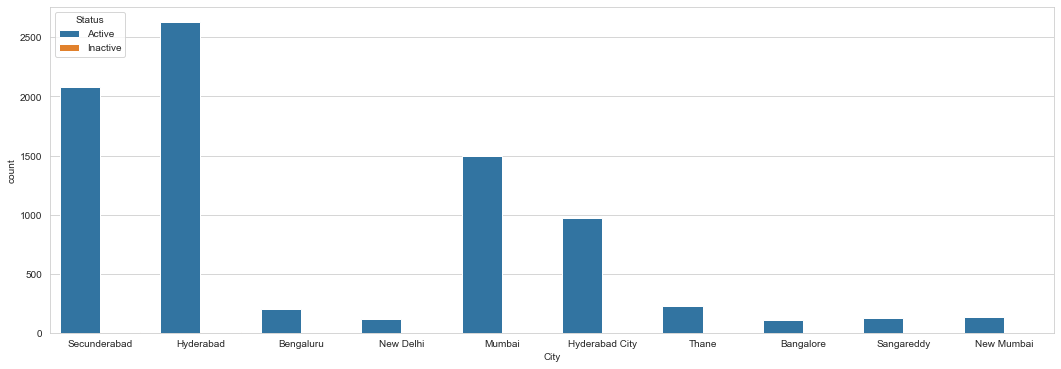

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))
sns.countplot(x='City', hue='Status', data=df_top_10)

### <font color=orange>  Out of this 10 top Cities above, We can see Hydrabad, Secundrabad, Mumbai & Hydrabad City covering 7000 custumers out of almost 10000 customer which is 70% </font> ###

In [21]:
#Creating a new data fram and Checking the Top 10 lowest Cities having InActive status
Low_10_cities = df['City'].value_counts().nsmallest(10).index.tolist()
df_Low_10 = df[df['City'].isin(Low_10_cities)]

<AxesSubplot:xlabel='City', ylabel='count'>

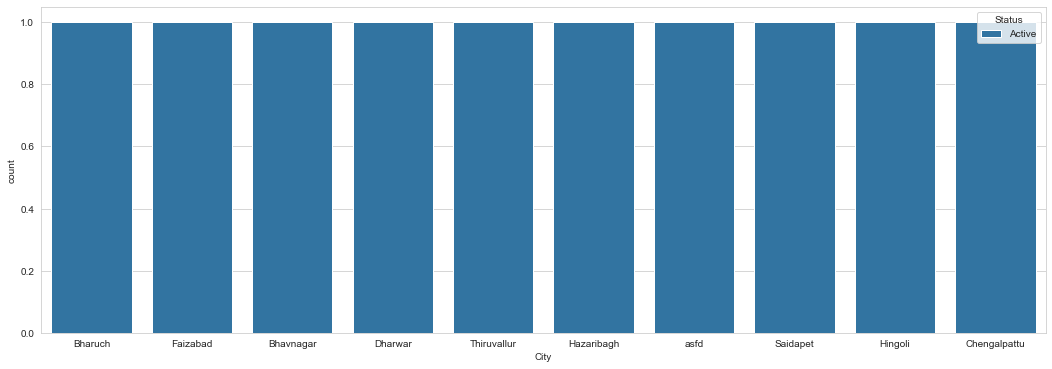

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))
sns.countplot(x='City', hue='Status', data=df_Low_10)

### <font color=orange>  The above ten cities are having only single customers, So we should focus more on these cities so that it increase the number of customers or Either we should close our services into these cities, so that we cannot going to faces any losses in future  </font> ###

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

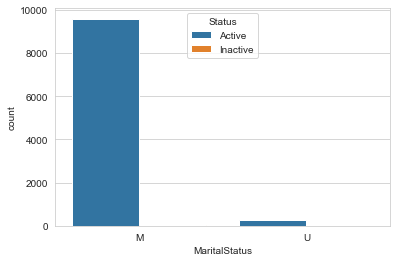

In [23]:
#Checking the customer Status by comparing MaritalStats
sns.set_style('whitegrid')
sns.countplot(x='MaritalStatus', hue='Status', data=df)

### <font color=orange>  We can see almost 99% of our customers are Married, And the number of Unmarried customers are very less, So we can create some plan to increase the Unmarried customers into our business, So that it will increase our business profit  </font> ###

<AxesSubplot:xlabel='GenderCode', ylabel='count'>

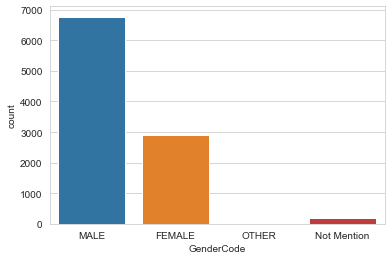

In [24]:
#Checking the customer Status by comparing Gendercodes
sns.set_style('whitegrid')
sns.countplot(x='GenderCode', data=df)

### <font color=orange>  Again we can see Most of our customers are Male compare to Female, So we should create some business plan to increase our Female customers too  </font> ###

In [25]:
#Creatig a Datafram for Inactive status and checking which GenderCode having most Inctive status
df_inactive = df[df['Status'] == 'Inactive']

<AxesSubplot:xlabel='GenderCode', ylabel='count'>

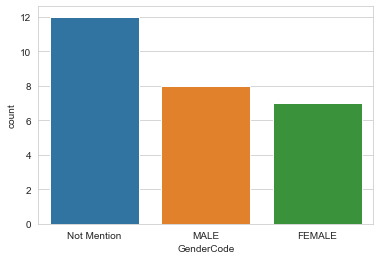

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='GenderCode',data=df_inactive)

### <font color=orange>  We can see 50% of our Inactive customers dont have GenderCode, So we have to findout their GenderCode so that we can get to know the exact reason why their status is Inactive  </font> ###

In [27]:
#Creating a data frame and converting the "Postalcode" column data from "Float" to "Integer" and also checking the total values of that column
df['PostalCode'] = df['PostalCode'].astype(int)
df['PostalCode'].value_counts()

500072    396
500032    256
500049    250
500084    242
500090    230
         ... 
458441      1
518543      1
576107      1
562101      1
515331      1
Name: PostalCode, Length: 1280, dtype: int64

### <font color=orange> [500072,500032,500049,500084 & 500090 ] These "Postal codes having more than Two hundred customers from our data sets. However [458441,518543,576107,562101 & 515331] these Postal codes are having only single customers </font> ###

In [28]:
df.groupby("GenderCode")["Status"].value_counts()

GenderCode   Status  
FEMALE       Active      2889
             Inactive       7
MALE         Active      6764
             Inactive       8
Not Mention  Active       177
             Inactive      12
OTHER        Active        17
Name: Status, dtype: int64

### <font color=orange> Now We can see overall status for Male, Femal & Others types of customers are very good, however for Not mentioned types of customers the Inactive status is in the Higher side  </font> ###

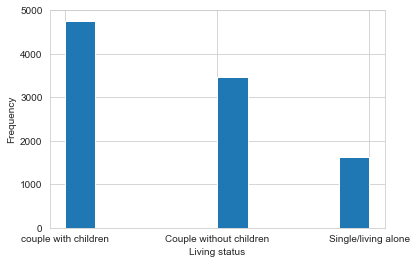

In [30]:
plt.hist(df['Living status'])
plt.xlabel('Living status')
plt.ylabel('Frequency')
plt.show()

### <font color=orange> Living Status for most of our customer is "Couple with Children" and "Couple without children". Single/Living alone customers number is little bit low compare to the Couple With/Without Children but it is accepted </font> ###

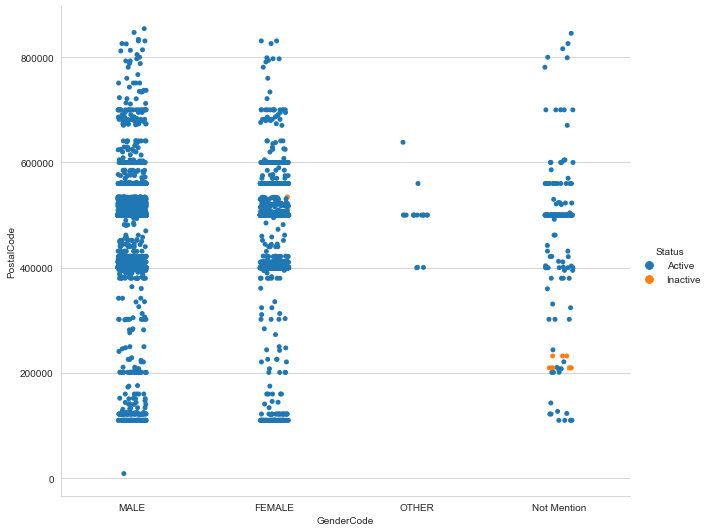

In [31]:
sns.catplot(x="GenderCode", y="PostalCode", hue="Status", data=df, height=7.5, aspect=1.2)

### <font color=orange> With the help of above Graph we can see most of the active customers are within the postal codes 400000 to 600000 and we can see a High number of Inactive Status nearly to 200000  </font> ###

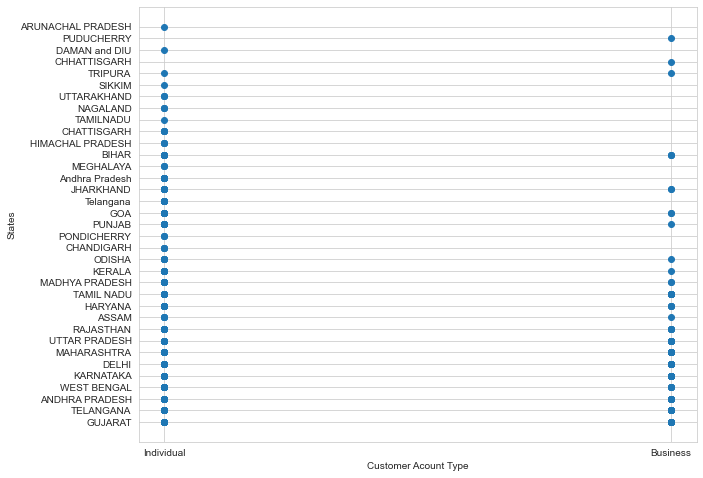

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Type'], df['State'])
plt.xlabel('Customer Acount Type')
plt.ylabel('States')
plt.show()

### <font color=orange> With the help of above Graph we can compare our customer type status with State. Here we can see only Puducherry and Chhattishgarh not having Individual customers. and we can also compare the same with Business types of customers   </font> ###